In [3]:
# Importaciones de librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("avocado.csv")

#Se eleiminan ya que son columnas que debido a que no tienen un nombre que sea relevente se eliminan
data = data.drop(columns=['4046', '4225', '4770'])
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


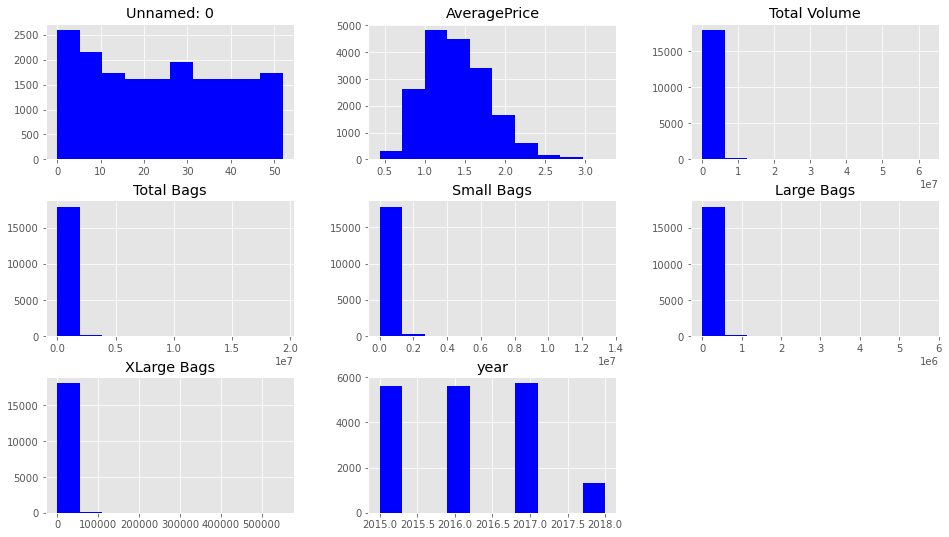

In [4]:
# Dispersión de datos

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data.hist(color = 'blue')
plt.show()

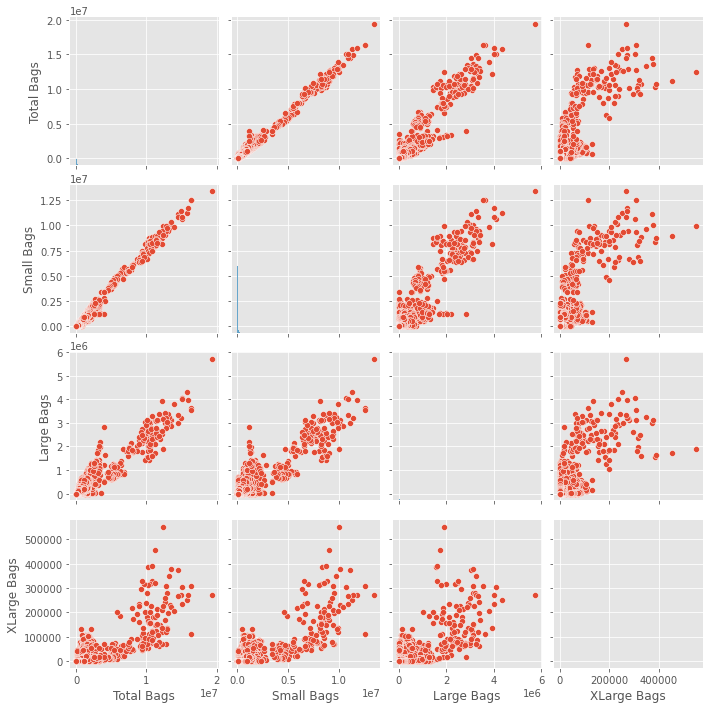

In [5]:
# Escoger dimensiones y se cruzan para ver agrupación y relación con categorías
sb.pairplot(data.dropna(), vars=["Total Bags","Small Bags","Large Bags", "XLarge Bags"])

In [6]:
#Se definen entradas
#Se cargan columnas en variable x
X = np.array(data[["Total Bags","Small Bags","Large Bags", "XLarge Bags"]])
y = np.array(data['year'])
X.shape

(18249, 4)

C:\Users\AbielBoga\AppData\Local\Temp\ipykernel_21244\3191081621.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


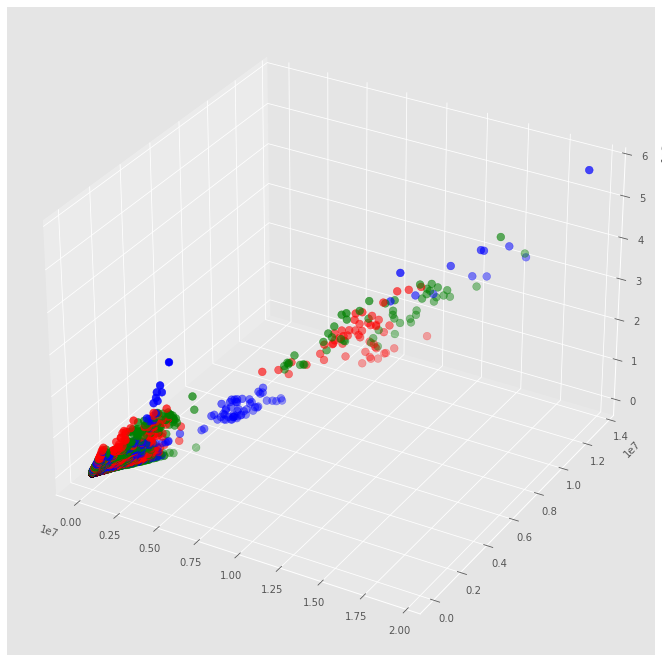

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

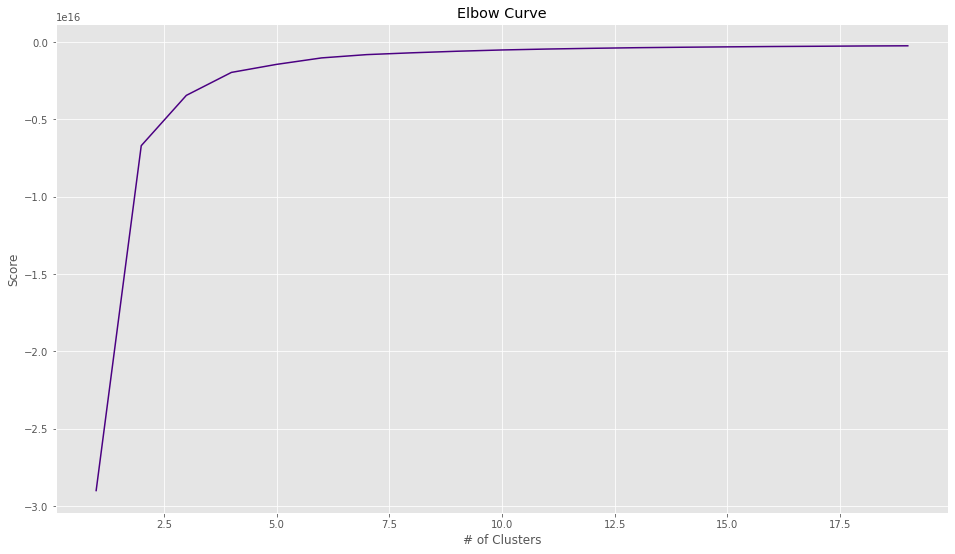

In [8]:
# Encontrar valor de K e intentando hallar el "punto de codo"
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, color='indigo')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
# Ejecutamos K-Means
# k = 3
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[8.56740016e+04 6.47802603e+04 2.00051142e+04 8.88626125e+02]
 [1.04817264e+07 7.87924614e+06 2.44682725e+06 1.55652996e+05]
 [1.67090041e+06 1.28926497e+06 3.58600192e+05 2.30352497e+04]]


C:\Users\AbielBoga\AppData\Local\Temp\ipykernel_21244\3744386241.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


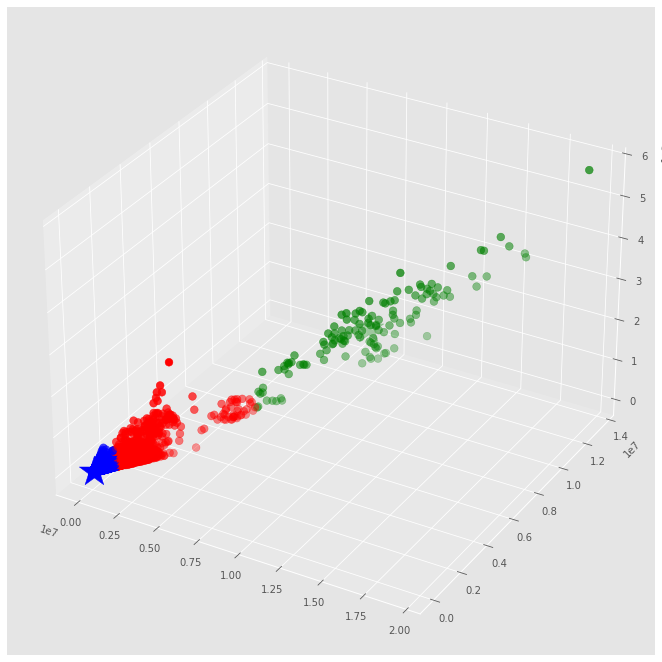

In [10]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','green','red',]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

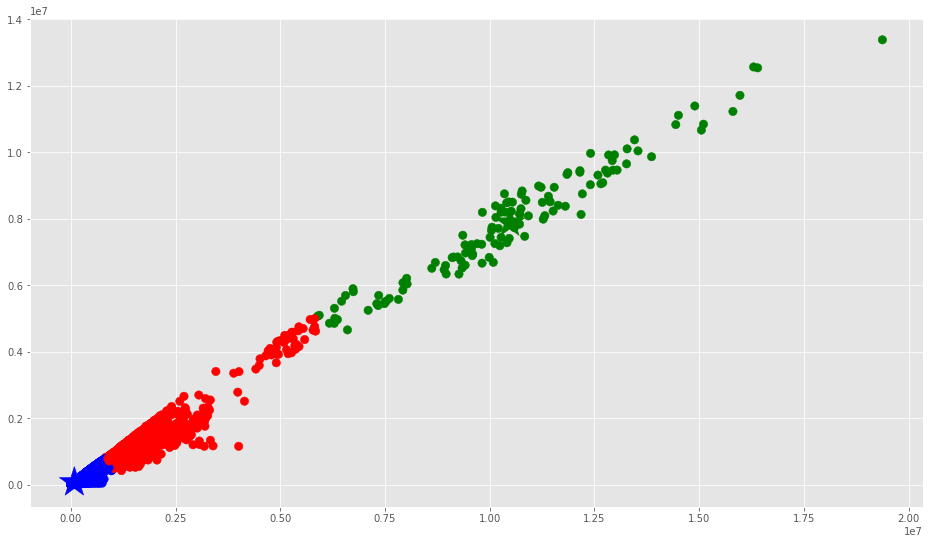

In [11]:
# Getting the values and plotting it
f1 = data["Total Bags"].values
f2 = data["Small Bags"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

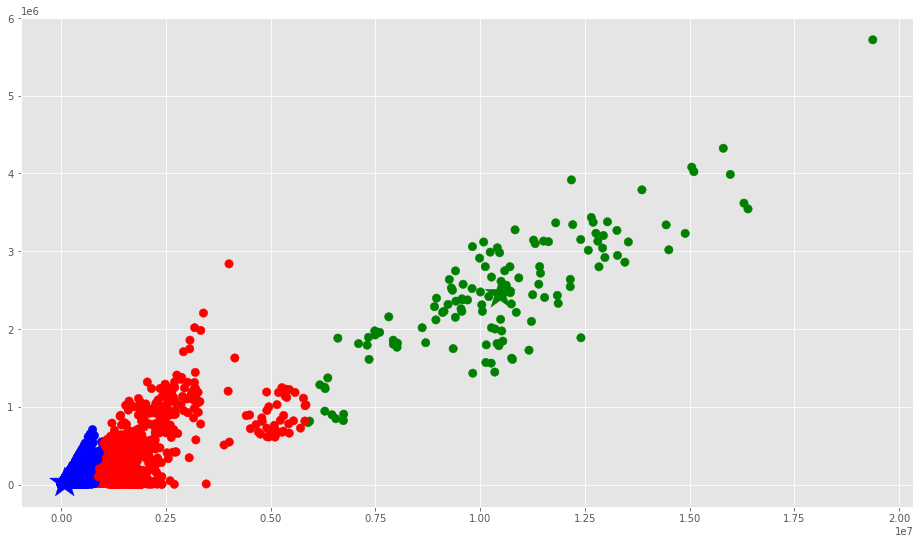

In [12]:
# Getting the values and plotting it
f1 = data['Total Bags'].values
f2 = data['Large Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

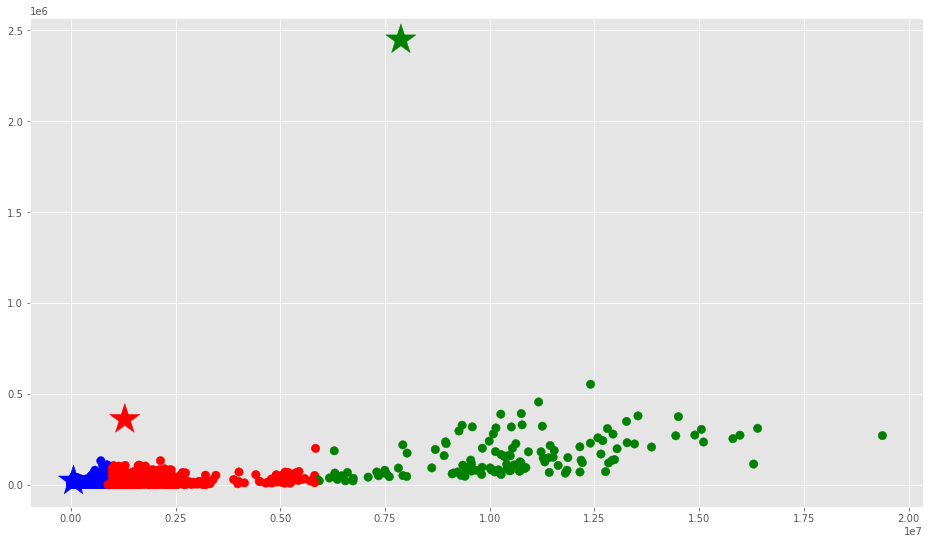

In [13]:
f1 = data['Total Bags'].values
f2 = data['XLarge Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [14]:
copy =  pd.DataFrame()
copy['AveragePrice']=data['AveragePrice'].values
copy['year']=data['year'].values
copy['label'] = labels;
qtygroup =  pd.DataFrame()
qtygroup['color']=colores
qtygroup['cantidad']=copy.groupby('label').size()
qtygroup

,color,cantidad
0,blue,17188
1,green,128
2,red,933


In [15]:
grp_ref_indx = copy['label'] ==0
grp_ref = copy[grp_ref_indx]
 
divgroup =  pd.DataFrame()
divgroup['year']=[2015,2016,2017,2018]
divgroup['cantidad']=grp_ref.groupby('AveragePrice').size()
divgroup

,year,cantidad
0,2015,NaN
1,2016,151.0
2,2017,59.0
3,2018,2.0


In [16]:
#vemos el representante del grupo, el usuario cercano a su centroid
nearest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
nearest

array([7683, 5497, 8661], dtype=int64)

In [18]:
prices=data['AveragePrice'].values
for row in nearest:
    print(prices[row])

0.81
0.9
1.27


###### ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Los centros de los grupos nos pueden ayudar para confirmar o comprobar alguna teoría o hipótesis que teníamos sobre nuestra muestra de datos. A la vez, nos puede ayudar a descubrir una nueva relación en los datos que no habíamos visto. Al final, con la ayuda de los centros podremos obtener las etiquetas de los grupos y cada vez que tengamos nuevos datos poder clasificarlos en nuestros grupos obtenidos.

###### ¿Cómo obtuviste el valor de k a usar?

El algoritmo de k means nos indica obtener la elbow curl, la cual tendremos que analizar y encontrar su punto de inflexión. Ese punto o el valor del punto es el valor de k, el cual es el número de grupos que crearemos

###### ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Mientras el valor de K sea más alto, los grupos que formemos  serán más precisos, por lo tanto, los valores del grupo se acercarán más al centro del grupo. Mientras más bajo que, significa que no se encuentran más similitudes.


###### ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

En nuestro caso tenemos 3 grupos, rojo, azul y verde. Los grupos rojo y azul tienen centros cercanos, mientras que el verde está más alejado de ellos. Esto significa que los grupos rojo y azul tienen más similitudes juntos que con el grupo verde.


###### ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Si tuviéramos varios valores atípicos, nuestra gráfica haría que las cajas sean más extensas y se acerquen más a los extremos de minimo y maximo, mientras que los bigotes que harían más cortos.

###### ¿Qué puedes decir de los datos basándose en los centros?

Un análisis rápido que podemos dar es que los grupos rojo y azul cuentan con una gran similitud, ya que sus centros son muy cercanos. Mientras que el grupo verde, es más único y no cuenta con tantas similitudes con ellos, ya que su centro está alejados del de ellos.
